In [ ]:
import re
import nltk
import string
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt 
import warnings

In [ ]:
%matplotlib inline


In [ ]:
pd.set_option("display.max_colwidth", 200) 


In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [ ]:
train  = pd.read_csv('/content/train_E6oV3lV.csv') 


In [ ]:
test = pd.read_csv('/content/test_tweets_anuFYb8.csv')


In [ ]:
train[train['label'] == 0].head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [ ]:
train[train['label'] == 1].head(20)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [ ]:
train.shape, test.shape


((31962, 3), (17197, 2))

In [ ]:
train["label"].value_counts()


0    29720
1     2242
Name: label, dtype: int64

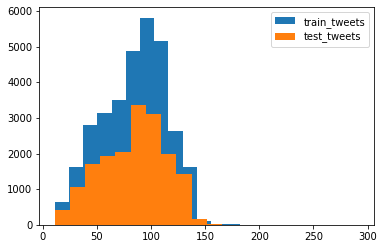

In [ ]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()


In [ ]:
combi = train.append(test, ignore_index=True,sort=False) 


In [ ]:
combi.shape


(49159, 3)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt


In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


In [ ]:
combi.head()


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [ ]:
combi.head()


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 


In [ ]:
tokenized_tweet.head()


0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                         [bihday, your, majesty]
3                                      [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import * 


In [ ]:
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet


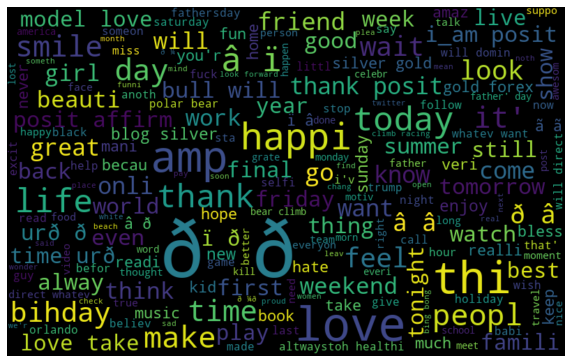

In [ ]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()


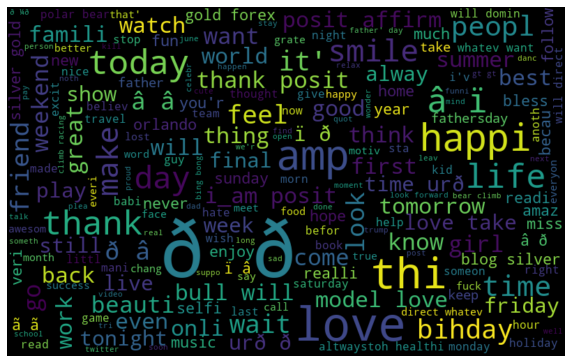

In [ ]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()


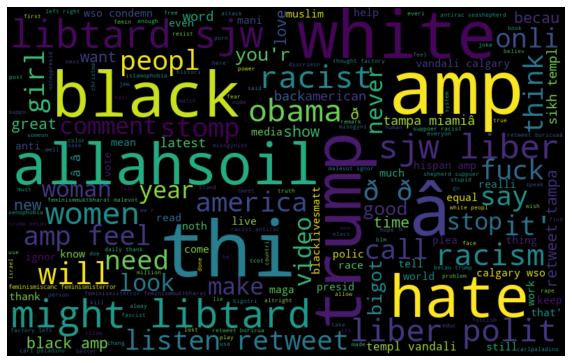

In [ ]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()


In [ ]:
def hashtag_extract(x): 
    hashtags = []    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)    
        hashtags.append(ht)    
    return hashtags


In [ ]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 


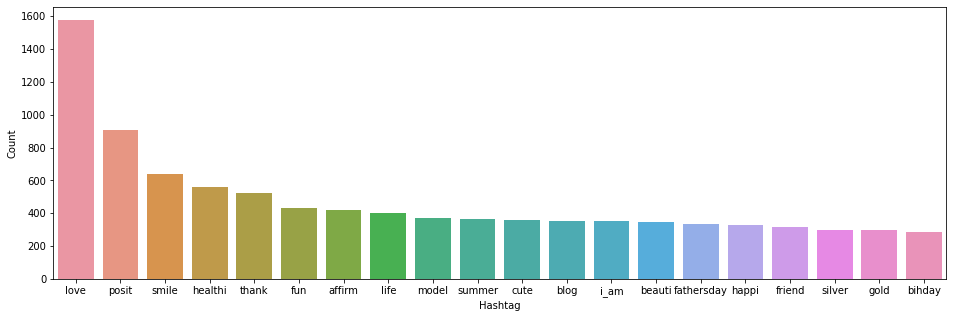

In [ ]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

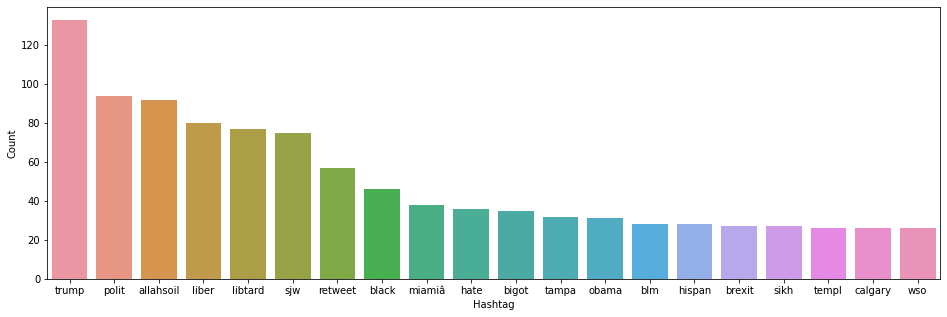

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6707927, 8184140)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import gensim

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6707369, 8184140)

In [ ]:
(6705580, 8184140)
model_w2v.wv.most_similar(positive="dinner")
[('spaghetti', 0.6545915603637695),
 ('shopping!', 0.6297552585601807),
 ('afternoon!', 0.6162984371185303),
 ('#toast', 0.6142357587814331),
 ('#biall2016', 0.6127634048461914),
 ('sister!!', 0.6038930416107178),
 ('#cellar', 0.5992326736450195),
 ('#london2016', 0.5941011905670166),
 ('#brunch', 0.5869306325912476),
 ('pamper', 0.5854953527450562)]


[('spaghetti', 0.6545915603637695),
 ('shopping!', 0.6297552585601807),
 ('afternoon!', 0.6162984371185303),
 ('#toast', 0.6142357587814331),
 ('#biall2016', 0.6127634048461914),
 ('sister!!', 0.6038930416107178),
 ('#cellar', 0.5992326736450195),
 ('#london2016', 0.5941011905670166),
 ('#brunch', 0.5869306325912476),
 ('pamper', 0.5854953527450562)]

In [ ]:
model_w2v['wish']


array([-0.20710336, -0.11042446, -0.8459033 , -0.46490481,  0.29626969,
        0.0992469 ,  0.20628364,  0.8329578 , -0.12454847, -0.3504492 ,
       -0.61166954,  0.12077734, -0.18921264,  0.4575128 , -0.343169  ,
        0.09676796,  0.15528323,  0.27709112,  0.5891127 ,  1.0256315 ,
       -0.6709539 ,  0.21987908, -0.26566267,  1.1852192 , -0.9596824 ,
        0.46062773, -0.9491409 ,  0.07381253, -0.0631495 ,  0.2071496 ,
        0.10360986,  0.36680245,  0.22083695,  0.23938967,  0.21761012,
       -0.68755436,  0.01144972, -0.16742642,  0.71714497, -0.1268213 ,
        1.100319  ,  0.268622  , -0.6619692 , -0.03186261,  0.99888337,
        0.0224899 , -0.25521737,  0.9549021 ,  0.73878247, -0.294177  ,
       -0.03841132,  0.3534055 , -0.4859031 , -0.6258086 , -0.7524991 ,
       -0.25701123,  0.57766455, -0.44166592,  0.15257773,  0.00263214,
        0.45969585, -0.75109744, -0.83191466,  0.7678778 ,  0.40779787,
        0.19576597, -0.2231525 ,  0.89524764,  0.10407991, -0.05

In [ ]:
model_w2v['car']


array([ 0.02958629, -0.28369412, -0.43272072, -0.06012176, -0.27750614,
        0.21909419,  0.34848198,  0.0360655 , -0.22034857,  0.18666103,
        0.03479541,  0.26644754,  0.11894812, -0.05524748, -0.17590682,
        0.16471252, -0.00803093,  0.27479288, -0.05946117,  0.03221019,
       -0.1757887 ,  0.2925745 , -0.15895854,  0.3321613 ,  0.16332872,
        0.49449754, -0.34220305,  0.04706569, -0.0862406 , -0.21123363,
        0.28461325,  0.49718407, -0.05190467,  0.64415544,  0.00383809,
       -0.14165382, -0.31822923, -0.77874386,  0.02506313, -0.14073057,
        0.06138621, -0.04989249, -0.3006349 ,  0.00430383,  0.1778229 ,
        0.25376773, -0.18305793, -0.05962178,  0.1599479 , -0.09934849,
       -0.280855  ,  0.16577026, -0.24685612, -0.3235016 , -0.13920417,
        0.05280731, -0.08535248, -0.3032147 , -0.05960141, -0.04667485,
        0.07551321, -0.21442278, -0.3183462 ,  0.15193519, -0.13617234,
        0.26917586,  0.05709651,  0.13452344, -0.08668356, -0.03

In [ ]:
model_w2v['insta']


array([ 3.87990735e-02, -9.82057601e-02,  7.98089951e-02, -1.55632615e-01,
        2.07316667e-01,  5.56774400e-02,  1.56844392e-01,  3.79363686e-01,
       -2.57469058e-01,  7.96741992e-03, -1.27172768e-01, -1.05098799e-01,
       -1.20134853e-01,  2.96091825e-01, -8.53304118e-02,  2.54905790e-01,
       -2.66733747e-02, -5.51658170e-03,  1.21003188e-01,  1.87494725e-01,
        3.23717743e-02, -4.51624304e-01, -1.50496319e-01,  2.96799213e-01,
       -2.07665518e-01,  3.45861055e-02, -3.49365547e-02, -4.09522831e-01,
        3.99524122e-01, -1.38748065e-01, -7.89239258e-02,  4.19115156e-01,
        4.41366464e-01,  2.88171738e-01, -2.16877773e-01, -1.96655571e-01,
        2.06009135e-01, -6.76987842e-02,  2.91568607e-01,  3.95913050e-02,
       -1.31980553e-01,  2.60284305e-01, -2.98470467e-01,  6.14877343e-02,
        1.70274168e-01, -2.31250286e-01,  1.69830203e-01,  2.52836019e-01,
        1.24651771e-02, -6.19227774e-02,  7.67306611e-02,  3.37414235e-01,
       -4.18653935e-02, -

In [ ]:
model_w2v['facebook']


array([ 0.2278232 , -0.03911138,  0.02340917, -0.0411587 , -0.41204894,
        0.37155685, -0.27697045,  0.26979095,  0.25438103,  0.41898692,
        0.01929231, -0.4075929 , -0.19091986, -0.02638394, -0.24516529,
        0.36056745,  0.35103917,  0.2987344 , -0.172032  ,  0.06717785,
       -0.00137905, -0.09849397,  0.30599266, -0.3655935 ,  0.36777344,
       -0.252799  , -0.04171439,  0.10481399, -0.33966976, -0.15180115,
        0.3386638 ,  0.20147489,  0.27773258, -0.00467276, -0.37464246,
       -0.10897575,  0.26043057, -0.17610803,  0.2004069 ,  0.47489464,
        0.46942016,  0.27593625, -0.07040313, -0.39028606,  0.14251259,
        0.23524868,  0.2596298 , -0.15278149,  0.200029  ,  0.18666175,
        0.14600565,  0.2183373 ,  0.28358546, -0.32995847, -0.223813  ,
        0.7271578 ,  0.08886693, -0.04386209,  0.30674174,  0.18256047,
       -0.01449961,  0.43531376,  0.17654395, -0.16136529, -0.57324916,
        0.08242565,  0.48504564,  0.044819  , -0.11740859, -0.05

In [ ]:
model_w2v['linkedin']


array([ 0.04389742,  0.2372247 , -0.17377675,  0.01076692, -0.1581679 ,
        0.04984111, -0.07376177,  0.21743158,  0.02556314,  0.15936752,
       -0.25162557, -0.04460406, -0.14779626,  0.27369386, -0.07526361,
        0.14763243,  0.18792024,  0.04419625,  0.24171823,  0.24959946,
        0.04317736, -0.24172078, -0.0054592 , -0.12470219,  0.16336139,
        0.05549902, -0.2732219 , -0.18954726,  0.08909546, -0.00862011,
        0.13205817,  0.20788093, -0.0007532 ,  0.23419967, -0.25011823,
       -0.13320021,  0.11876217,  0.06767295,  0.23720357,  0.242898  ,
        0.22007722,  0.27791452,  0.06301715, -0.14592227,  0.18520823,
       -0.09953814, -0.14183377,  0.09862987,  0.2870876 ,  0.14617006,
        0.05426648,  0.22436215,  0.1527275 , -0.16513367,  0.07529651,
        0.1841617 , -0.0194174 , -0.19621918,  0.15487598,  0.04993529,
       -0.10267529,  0.16266504, -0.1004766 , -0.21940506, -0.14249721,
        0.14211933,  0.2514394 ,  0.22142503, -0.21028638,  0.01

In [ ]:
model_w2v['food']


array([ 0.6219194 ,  0.26615453, -0.4398483 , -0.23659734, -0.4480706 ,
       -0.16472204, -0.04815356,  0.7262    ,  0.09165306, -0.27235466,
       -0.40872473,  0.28731835, -0.08031795, -0.03563694, -0.5628972 ,
       -1.063497  ,  0.5595341 ,  0.89207655,  0.11626267,  0.8810261 ,
        0.6557087 ,  0.47663602, -0.40112832, -0.57930815, -0.37955412,
       -0.24216408, -0.4276138 , -0.2123991 ,  0.68483585, -0.25291306,
        0.5435063 ,  1.0132036 , -0.1947144 , -0.4601364 , -0.1153578 ,
        0.09689166, -0.09721991, -1.0661395 , -0.25857225, -0.2562848 ,
       -0.5733752 ,  0.26497   , -0.31286445,  0.00188173,  0.64202505,
        0.5210616 , -0.08345523,  0.2070531 , -0.09291495,  0.13838275,
       -0.26421764,  0.49580932, -0.26435637,  0.37296492, -0.12528053,
        0.8150211 , -0.28933504, -0.51204425,  0.20137371,  0.1771091 ,
        0.31396532, -0.6605048 ,  0.418394  ,  0.549078  , -0.5048325 ,
        0.27231684, -0.10696024, -0.1175418 , -0.3288835 ,  0.18

In [ ]:
model_w2v['hotel']


array([-0.35434988,  0.28452024, -0.4150033 , -0.25408944, -0.02035988,
        0.26006195,  0.6366392 , -0.21103512, -0.05417708,  0.6994312 ,
       -0.5657011 ,  0.40073323, -0.83381283, -0.16652793, -0.46527305,
       -0.2284971 ,  0.18986227, -0.31401408,  0.5178034 ,  0.43039238,
        0.15305607, -0.38353845,  0.36505124, -0.2966847 ,  0.04663035,
        0.65641433, -0.5191615 , -0.7064377 ,  0.0024361 , -0.1776171 ,
       -0.3748249 ,  0.46223205, -0.37114766,  0.13424954, -0.23136659,
       -0.18474257, -0.1029975 ,  0.46985868,  0.217417  ,  0.29317608,
        0.00455771,  0.45485884, -0.22591215, -0.13606597, -0.19655412,
       -0.28508464, -0.14814363, -0.58382964, -0.11182339, -0.02402543,
       -0.11273691,  0.01349211, -0.35564837, -0.13333537, -0.00334767,
        0.3156049 , -0.2550213 , -0.4446672 , -0.51943916,  0.49384966,
        0.16972029,  0.01424238, -0.12577082, -0.01230039, -0.5102821 ,
        0.23584376,  0.39889157,  0.31475857, -0.08393531, -0.36

In [ ]:
model_w2v['show']


array([-0.38543802,  0.03635263, -0.7272432 , -0.5041835 ,  0.31600899,
        0.27058637,  0.35710177,  0.38301465,  0.24233043,  0.645804  ,
       -0.98555785, -0.69730735, -0.33136877, -0.32339767, -0.00810493,
        0.06242979,  0.33283532,  0.3032609 ,  0.19290617,  0.5968071 ,
        0.11325319, -0.03576666,  1.1557878 ,  0.47285694,  0.2653096 ,
        0.2341911 ,  0.12801647, -0.82351273, -0.28687268, -0.5504213 ,
       -0.31486478,  0.05230533, -0.13799532, -0.09454956, -0.44769818,
       -0.86491454, -0.61827326,  0.18802698,  0.45234442, -0.39458612,
       -0.26630044,  0.55076456, -0.1739112 ,  0.49773476,  0.9793956 ,
        0.23305394,  0.11937446, -0.24550767,  0.7360891 ,  0.9014921 ,
       -0.7540898 , -0.27737865, -0.95705384,  0.637523  , -0.31981844,
        0.3382067 ,  0.14370322, -0.55798787,  0.17961726,  0.27015182,
        0.36029038,  0.4526627 , -0.49187315, -0.13031228, -0.48257092,
        0.50649023,  1.3002125 , -0.14711607,  0.21652599,  0.17

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
            
            # handling the case where the token is not in vocabulary                                     continue
        if count != 0:
            vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape 
(49159, 200)
from tqdm import tqdm
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet)
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', "can't", 'cau', 'they', "don't", 'offer', 'wheelchair', 'van', 'pdx.', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fare', 'talk', 'befor', 'they', 'leave.', 'chao', 'disput', 'when', 'they', 'there.', '#allshowandnogo'], tags=['tweet_5'])]

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   dm_mean=1, # dm = 1 for using mean of the context word vectors                                  size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])


100%|██████████| 49159/49159 [00:00<00:00, 1774192.58it/s]


In [ ]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)
